In [68]:
import pyautogui as pag
from pprint import pprint
from matplotlib import pyplot as plt
from PIL import Image
from time import sleep
import pytesseract as tess
import cv2 as cv
import numpy as np
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

# Example functions

## Get mouse pos and resolution

In [6]:
# Get cursor pos
pag.position()

Point(x=1080, y=506)

In [7]:
# exists on the screen?
print(pag.onScreen(500, 600))
print(pag.onScreen(0, 10000))

True
False


In [10]:
# screen resolution
pag.size()

Size(width=1920, height=1080)

## Control mouse

In [19]:
pag.PAUSE = 0.25
# Move mouse
pag.moveTo(500, 500)
pag.moveTo(600, 500)
pag.moveTo(600, 600)
pag.moveTo(500, 600)
pag.moveTo(500, 500)

In [82]:
pag.PAUSE = 0
# Move mouse slowly
easeFunc = pag.easeInOutCubic;

pag.moveTo(500, 500, 0.25, easeFunc)
pag.moveTo(600, 500, 0.25, easeFunc)
pag.moveTo(600, 600, 0.25, easeFunc)
pag.moveTo(500, 600, 0.25, easeFunc)
pag.moveTo(500, 500, 0.25, easeFunc)

In [23]:
# Move mouse relative
pag.moveRel(100,10,0.25)

In [27]:
# click
pag.PAUSE = 0.25
# pag.click(x, y, clicks, interval, button)
pag.click(30,1060,2,1,"left")
pag.rightClick(30, 1060)

# pag.rightClick(x, y)
# pag.doubleClick(x, y)
# pag.tripleClick(x, y)
# pag.middleClick(x, y)
# pag.mouseDown(x=x, y=y, button='left')
# pag.mouseUp(x=x, y=y, button='left')

In [46]:
# Scroll
pag.PAUSE = 0

pag.moveTo(30,1060, 0.25)
pag.leftClick(30,1060)
pag.moveRel(150,-150,0.25);
# pag.scroll(amount_to_scroll, x=x_movement, y=y_movement)
pag.PAUSE = 1
pag.scroll(-500)
pag.scroll(250)

## Keyboard

In [47]:
print(pag.KEYBOARD_KEYS)

['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'accept', 'add', 'alt', 'altleft', 'altright', 'apps', 'backspace', 'browserback', 'browserfavorites', 'browserforward', 'browserhome', 'browserrefresh', 'browsersearch', 'browserstop', 'capslock', 'clear', 'convert', 'ctrl', 'ctrlleft', 'ctrlright', 'decimal', 'del', 'delete', 'divide', 'down', 'end', 'enter', 'esc', 'escape', 'execute', 'f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f20', 'f21', 'f22', 'f23', 'f24', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'final', 'fn', 'hanguel', 'hangul', 'hanja', 'help', 'home', 'insert', 'junja', 'kana', 'kanji', 'launchapp1', 'launchapp2', 'launchmai

In [50]:
# Write in a textfield
pag.PAUSE = 0.1
pag.moveTo(200,200, 0.25)
pag.leftClick(200,200)
pag.typewrite("Detta är ett spöke!\n", 0.1)

In [67]:
# Hotkeys and press(), keyDown(), and keyUp()
pag.moveTo(200,200, 0.25)
pag.leftClick(200,200)
pag.press('enter')
pag.hotkey('ctrl', "v")
pag.press('enter')

pag.keyDown('shift')
pag.press("a")
pag.press("b")
pag.keyUp('shift')
pag.press("c")

pag.press("numlock")
pag.keyDown('altright')
pag.press("num1")
pag.press("num3")
pag.press("num2")
pag.keyUp('altright')
pag.press("numlock")


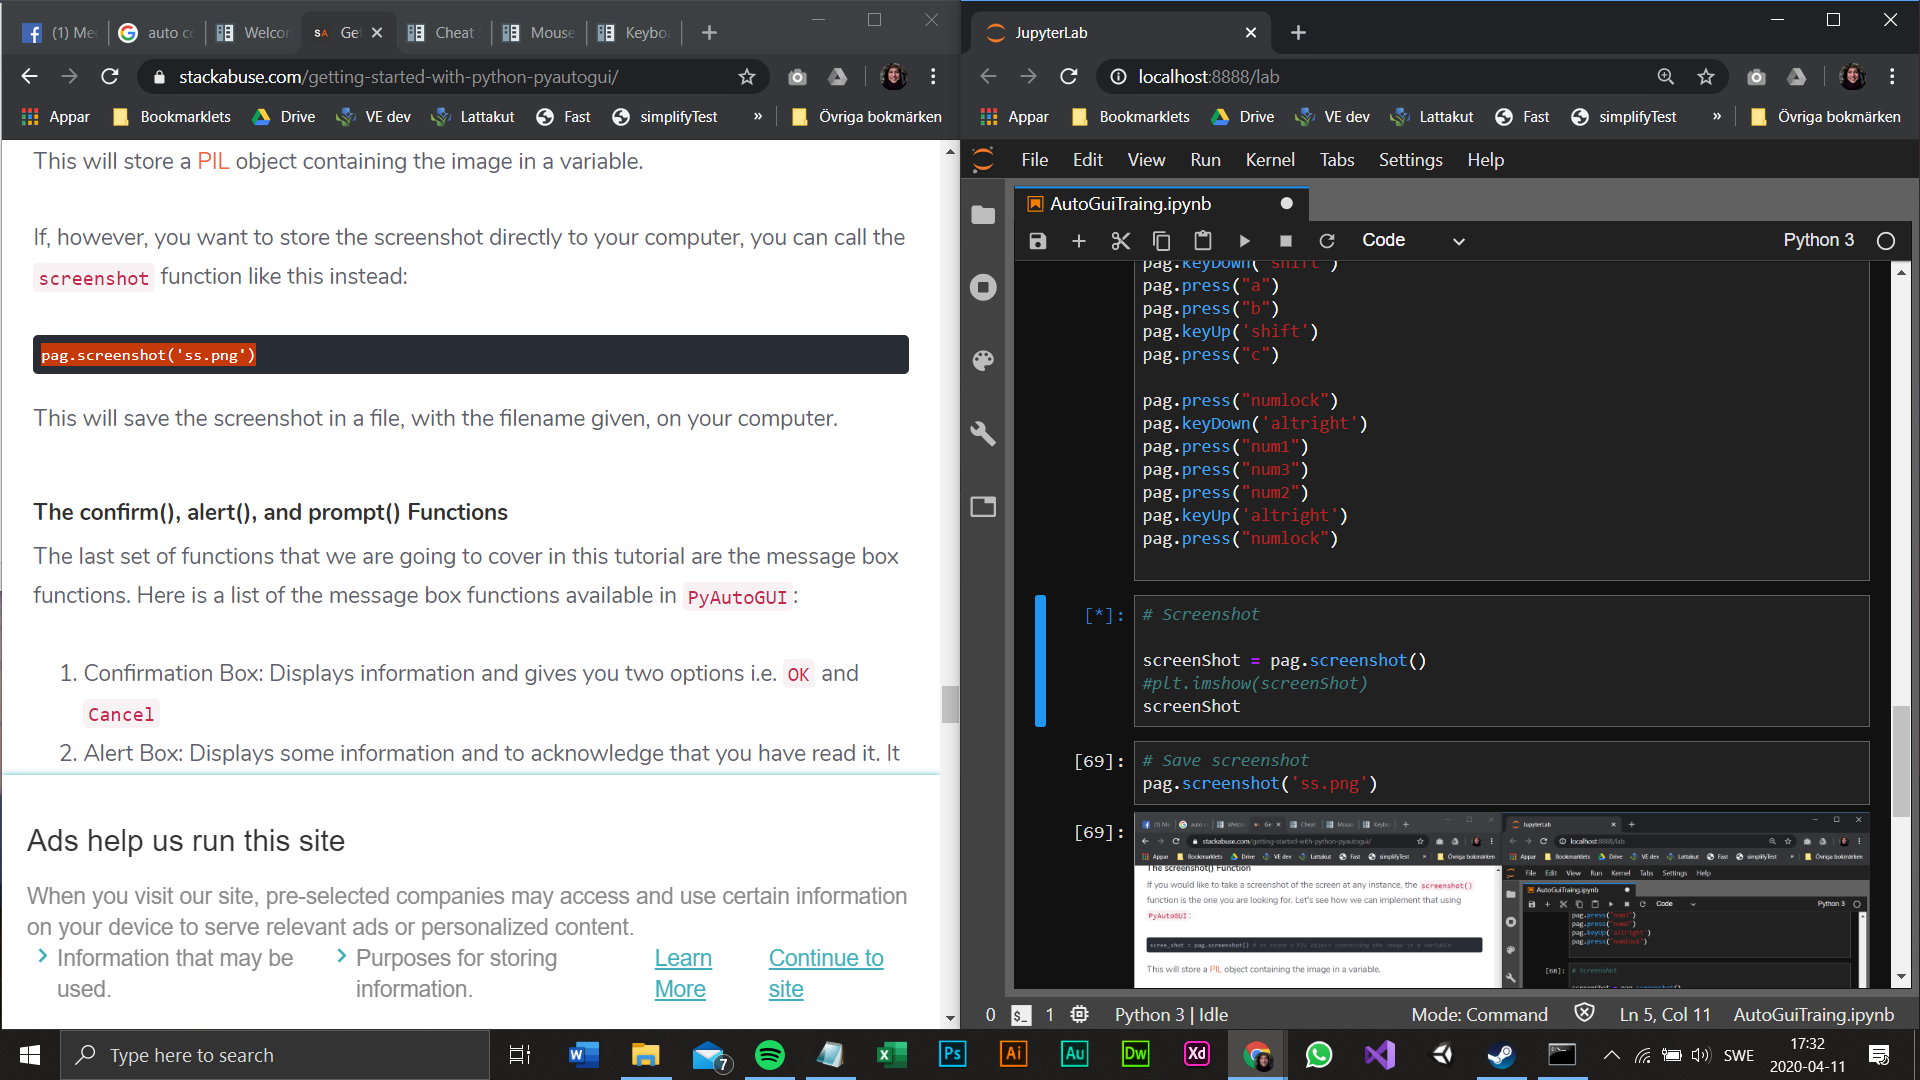

In [71]:
# Screenshot

screenShot = pag.screenshot()
#plt.imshow(screenShot)
screenShot

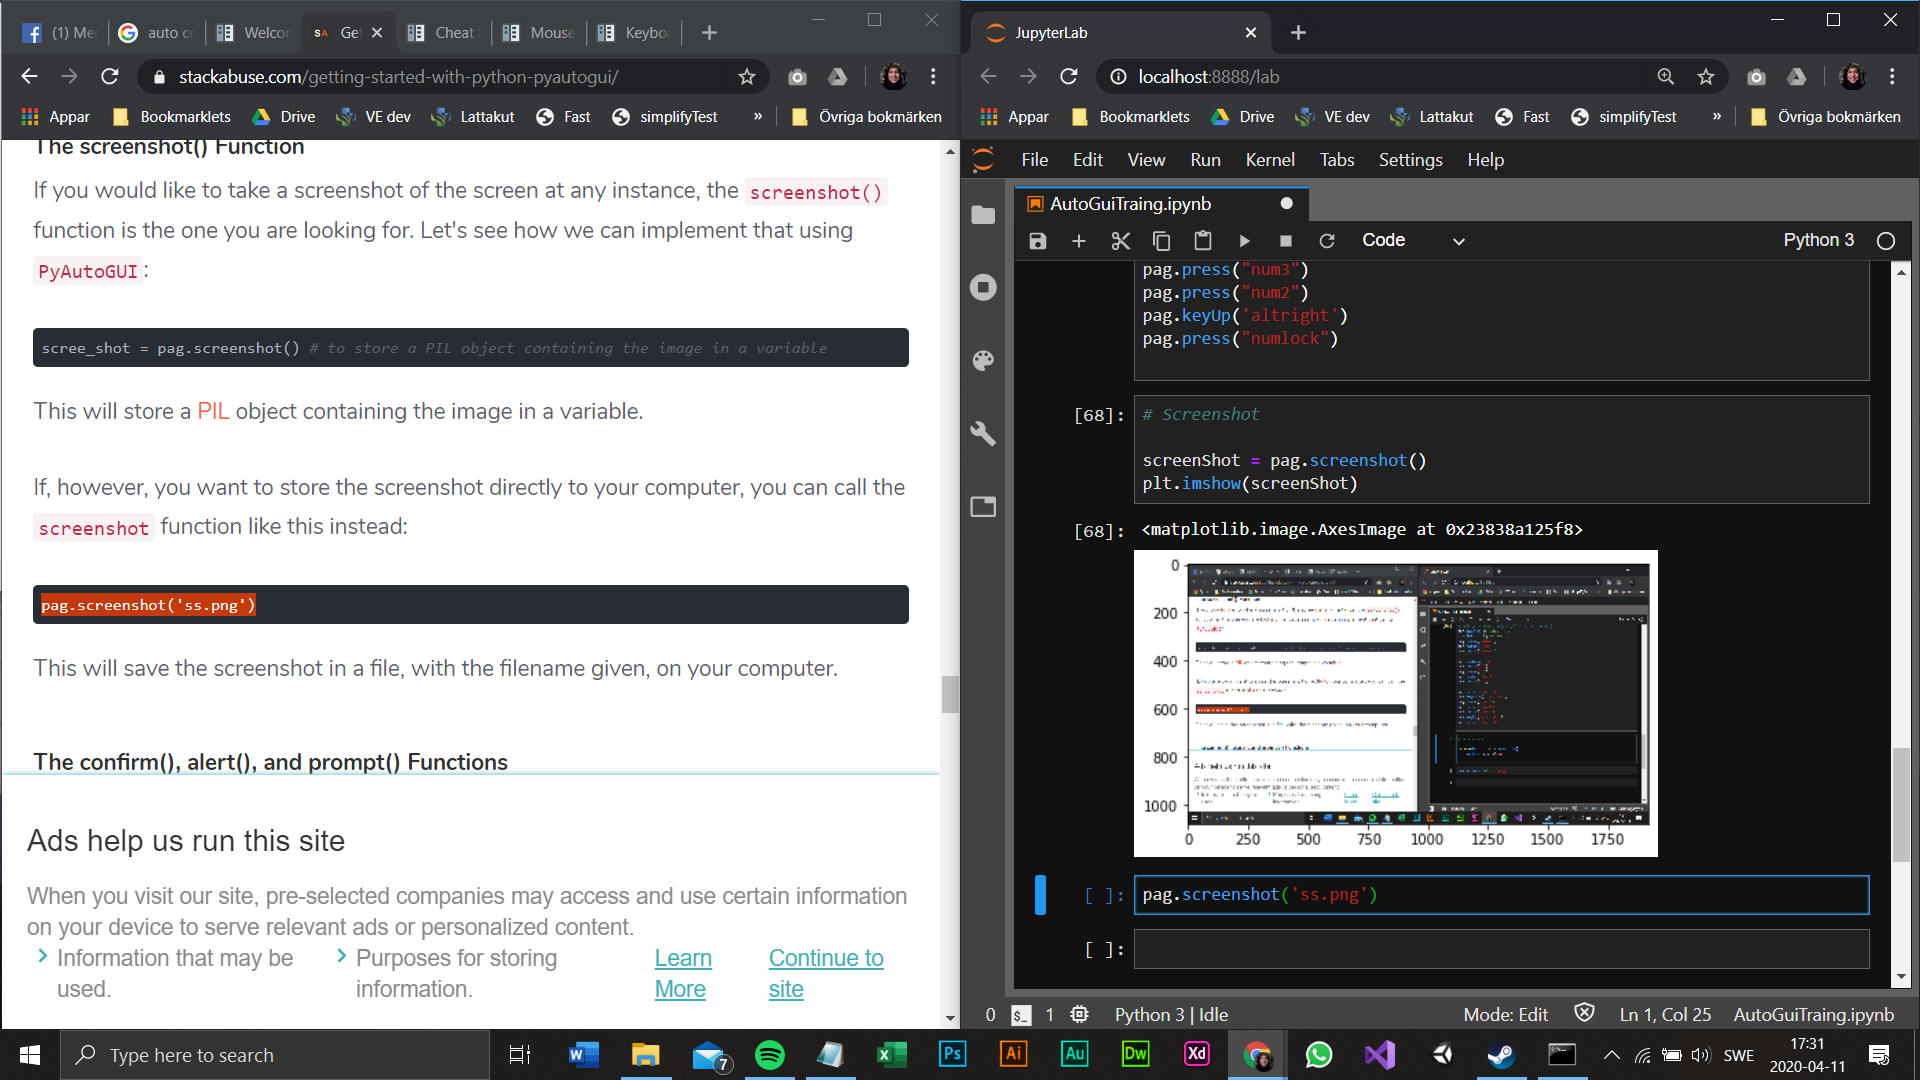

In [69]:
# Save screenshot
pag.screenshot('ss.png')

## Dialogue

In [80]:
name = ""
if pag.confirm("Are you ready?") == "OK":
    name = pag.prompt("Please enter your name: ")
    
if name == "test":
    pag.alert("Oh, you're just a tester")

## Locate

In [91]:
# Find a pic on screen and then find its center using center()

try:
    box = pag.locateOnScreen('TrainingTargets/editMenu.png', confidence=0.5)
    print("Box: ", box)
    pos = pag.center(box)
    print("Pos: ", pos)
    pag.moveTo(pos[0],pos[1],1);
except Exception as e:
    print(str(e))

Box:  None
'NoneType' object is not subscriptable


In [92]:
# Shortcut for finding center

try:
    pos = pag.locateCenterOnScreen('TrainingTargets/editMenu.png', confidence=0.5)
    print("Pos: ", pos)
    pag.moveTo(pos[0],pos[1],1);
except Exception as e:
    print(str(e))

Pos:  Point(x=58, y=50)


In [ ]:
# Variations

# locateOnScreen(image, grayscale=False)
# locateCenterOnScreen(image, grayscale=False)
# locateAllOnScreen(image, grayscale=False)
# locate(needleImage, haystackImage, grayscale=False) 
# - Returns (left, top, width, height) coordinate of first found instance of needleImage in haystackImage
# locateAll(needleImage, haystackImage, grayscale=False)


In [95]:
needle = Image.open("TrainingTargets/notepadE.png")
haystack =  Image.open("TrainingTargets/fullNotepad.png")
needle

### Needle in haystack

In [109]:
# Find all e:s in notepad and write a captial E next to them.

es = pag.locateAll(needle, haystack, confidence = 0.8)
for e in es:
    pos = pag.center(e)
    pag.moveTo(pos[0], pos[1], 1)
    pag.leftClick(pos[0],pos[1])
    pag.hotkey("shift", "e")

### Using a region

In [112]:
# Find all e:s in notepad and write a captial E next to them.

es = pag.locateAllOnScreen(needle, region=(0,60,400,400), grayscale=True, confidence = 0.8)
for e in es:
    pos = pag.center(e)
    pag.moveTo(pos[0], pos[1], 1)
    pag.leftClick(pos[0],pos[1])
    pag.hotkey("shift", "e")

# Using tesseract OCR

In [31]:
resources = cv.imread("AOETargets/aoe_resources.png")
ocrSimple = cv.imread("TrainingTargets/ocr_test.png")

In [37]:
# SHOWING WITH CV
# cv.imshow("Resources", gray)
# cv.waitKey(0)
# cv.destroyAllWindows()

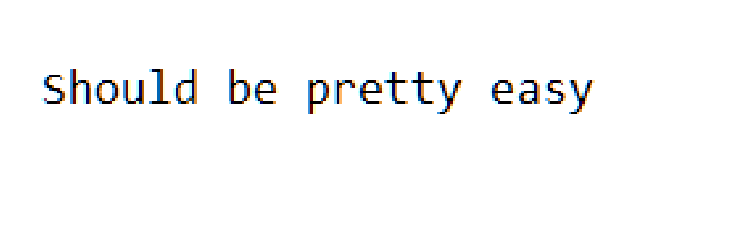

In [41]:
def imshow(img, cmap=None):
    if type(img) == str:
        img = cv.imread(img)
    elif(not type(img) == np.ndarray):
        return
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.Axes(fig, [0,0,1,1])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap)
        
imshow(ocrSimple)

In [42]:
print(tess.image_to_string(ocrSimple))

Should be pretty easy


Result:  


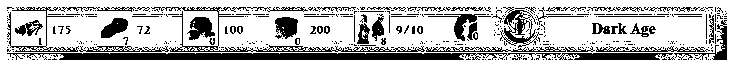

In [66]:
def get_inverted(image):
    return cv.bitwise_not(image)


# get grayscale image
def get_grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)


#thresholding
def thresholding(image):
    return cv.threshold(image, 180, 255, cv.THRESH_BINARY)[1]
    #return cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    
    
    


inv = get_inverted(resources)
gray = get_grayscale(inv)
thresh = thresholding(gray)
imshow(thresh, cmap='gray')
print("Result: ", tess.image_to_string(thresh))

In [63]:
print(tess.image_to_string(thresh))

In [70]:
numPic = cv.imread("TrainingTargets/ocr_175.png")
custom_config = r'--oem 3 --psm 6 outputbase digits'
# whitelist: custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
# blacklist: custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print("Result: ", tess.image_to_string(numPic, config=custom_config))

Result:  75


In [2]:
print(['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(',
')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
'8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
'a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~',
'accept', 'add', 'alt', 'altleft', 'altright', 'apps', 'backspace',
'browserback', 'browserfavorites', 'browserforward', 'browserhome',
'browserrefresh', 'browsersearch', 'browserstop', 'capslock', 'clear',
'convert', 'ctrl', 'ctrlleft', 'ctrlright', 'decimal', 'del', 'delete',
'divide', 'down', 'end', 'enter', 'esc', 'escape', 'execute', 'f1', 'f10',
'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f20',
'f21', 'f22', 'f23', 'f24', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
'final', 'fn', 'hanguel', 'hangul', 'hanja', 'help', 'home', 'insert', 'junja',
'kana', 'kanji', 'launchapp1', 'launchapp2', 'launchmail',
'launchmediaselect', 'left', 'modechange', 'multiply', 'nexttrack',
'nonconvert', 'num0', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6',
'num7', 'num8', 'num9', 'numlock', 'pagedown', 'pageup', 'pause', 'pgdn',
'pgup', 'playpause', 'prevtrack', 'print', 'printscreen', 'prntscrn',
'prtsc', 'prtscr', 'return', 'right', 'scrolllock', 'select', 'separator',
'shift', 'shiftleft', 'shiftright', 'sleep', 'space', 'stop', 'subtract', 'tab',
'up', 'volumedown', 'volumemute', 'volumeup', 'win', 'winleft', 'winright', 'yen',
'command', 'option', 'optionleft', 'optionright'])

['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'accept', 'add', 'alt', 'altleft', 'altright', 'apps', 'backspace', 'browserback', 'browserfavorites', 'browserforward', 'browserhome', 'browserrefresh', 'browsersearch', 'browserstop', 'capslock', 'clear', 'convert', 'ctrl', 'ctrlleft', 'ctrlright', 'decimal', 'del', 'delete', 'divide', 'down', 'end', 'enter', 'esc', 'escape', 'execute', 'f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f20', 'f21', 'f22', 'f23', 'f24', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'final', 'fn', 'hanguel', 'hangul', 'hanja', 'help', 'home', 'insert', 'junja', 'kana', 'kanji', 'launchapp1', 'launchapp2', 'launchmai